# Pre-Processing Data


*   Aanisah Rizka QB
*   Renaldo Pradipta



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving List of Orders.csv to List of Orders (1).csv
Saving Order Details.csv to Order Details (1).csv
Saving Sales target.csv to Sales target (1).csv


In [ ]:
# Importing Some Python Modules
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [ ]:
order = pd.read_csv('List of Orders.csv')
order_detail = pd.read_csv('Order Details.csv')
sales = pd.read_csv('Sales target.csv')

In [ ]:
order.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [ ]:
sales.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


In [ ]:
data2 = pd.merge(order,order_detail,on='Order ID')
data2.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones


In [ ]:
data2.columns

Index(['Order ID', 'Order Date', 'CustomerName', 'State', 'City', 'Amount',
       'Profit', 'Quantity', 'Category', 'Sub-Category'],
      dtype='object')

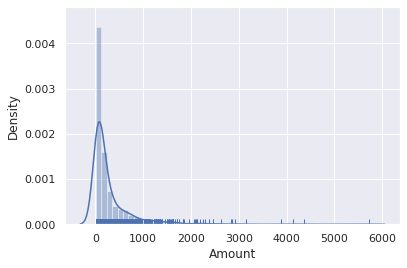

In [ ]:
p = sns.distplot(data2['Amount'], kde=True, rug=True)

In [ ]:
df = np.abs(data2.Amount - data2.Amount.mean())<=(2*data2.Amount.std())
# mu-2s<x<mu+2s
print(df.shape)
df.head()

(1500,)


0    False
1     True
2     True
3     True
4     True
Name: Amount, dtype: bool

Z-score adalah untuk mendeskripsikan suatu titik data dengan menemukan hubungannya dengan Standar Deviasi dan Mean dari kelompok titik data tersebut. Z-score digunakan untuk menemukan outlier pada data.

In [ ]:
#z-score 
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data2['Amount']))
print(z)

[2.14219766 0.48094934 0.60679096 ... 1.17234927 0.5503792  0.46793124]


In [ ]:
#daftar outlier pada data 
threshold = 3
print(np.where(z > 3))

(array([   6,  250,  462,  472,  483,  548,  589,  653,  673,  743,  780,
        789,  834,  836,  853,  907,  956, 1055, 1061, 1104, 1116, 1167,
       1183, 1215, 1252, 1356, 1466, 1496]),)


In [ ]:
data = data2[df] # Data tanpa outliers
print(data.shape, data2.shape)

(1427, 10) (1500, 10)


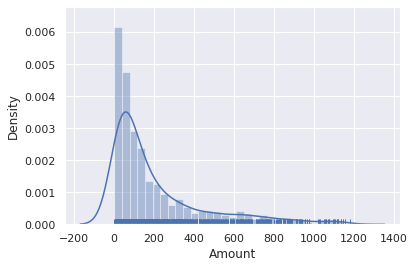

In [ ]:
p = sns.distplot(data['Amount'], kde=True, rug=True)

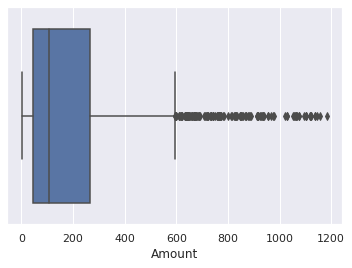

In [ ]:
import seaborn as sns
sns.boxplot(x=data['Amount'])

In [ ]:
data['Month Category'] =pd.DataFrame(data["Order Date"])
data['Month Category'] =pd.DatetimeIndex(data['Order Date']).strftime('%m-%Y')

In [ ]:
data['Month Category'].value_counts()

01-2019    154
08-2018    145
03-2019    135
11-2018    111
10-2018    105
06-2018     94
04-2018     87
05-2018     83
09-2018     75
07-2018     69
02-2019     62
12-2018     49
01-2018     43
03-2018     39
10-2019     34
04-2019     24
08-2019     23
05-2019     19
09-2019     18
02-2018     15
06-2019     15
07-2019     14
11-2019     11
12-2019      3
Name: Month Category, dtype: int64

In [ ]:
data['Day Category'] =pd.DataFrame(data["Order Date"])
data['Day Category'] =pd.DatetimeIndex(data['Order Date']).strftime('%A')

In [ ]:
data['Day Category'].value_counts()

Thursday     274
Friday       220
Sunday       215
Monday       198
Tuesday      190
Saturday     179
Wednesday    151
Name: Day Category, dtype: int64

In [ ]:
data.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,Month Category,Day Category
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole,01-2018,Thursday
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief,01-2018,Thursday
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games,01-2018,Thursday
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones,01-2018,Thursday
5,B-25602,01-04-2018,Pearl,Maharashtra,Pune,424.0,-272.0,5,Electronics,Phones,01-2018,Thursday


In [ ]:
data.tail()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,Month Category,Day Category
1494,B-26099,30-03-2019,Bhishm,Maharashtra,Mumbai,207.0,37.0,4,Clothing,Hankerchief,03-2019,Saturday
1495,B-26099,30-03-2019,Bhishm,Maharashtra,Mumbai,835.0,267.0,5,Electronics,Phones,03-2019,Saturday
1497,B-26100,31-03-2019,Hitika,Madhya Pradesh,Indore,828.0,230.0,2,Furniture,Chairs,03-2019,Sunday
1498,B-26100,31-03-2019,Hitika,Madhya Pradesh,Indore,34.0,10.0,2,Clothing,T-shirt,03-2019,Sunday
1499,B-26100,31-03-2019,Hitika,Madhya Pradesh,Indore,72.0,16.0,2,Clothing,Shirt,03-2019,Sunday


In [ ]:
data['Amount'].describe()

count    1427.000000
mean      207.878066
std       243.378264
min         4.000000
25%        44.000000
50%       108.000000
75%       264.000000
max      1183.000000
Name: Amount, dtype: float64

In [ ]:
data['Amount Category']=pd.cut(data['Amount'],bins=[0.0,108,264,1183],labels=['Rendah','Sedang','Tinggi'])

In [ ]:
data['Amount Category'].value_counts()

Rendah    717
Tinggi    356
Sedang    354
Name: Amount Category, dtype: int64

In [ ]:
data.head().transpose()

,1,2,3,4,5
Order ID,B-25601,B-25601,B-25601,B-25602,B-25602
Order Date,01-04-2018,01-04-2018,01-04-2018,01-04-2018,01-04-2018
CustomerName,Bharat,Bharat,Bharat,Pearl,Pearl
State,Gujarat,Gujarat,Gujarat,Maharashtra,Maharashtra
City,Ahmedabad,Ahmedabad,Ahmedabad,Pune,Pune
Amount,66,8,80,168,424
Profit,-12,-2,-56,-111,-272
Quantity,5,3,4,2,5
Category,Clothing,Clothing,Electronics,Electronics,Electronics
Sub-Category,Stole,Hankerchief,Electronic Games,Phones,Phones


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1427 entries, 1 to 1499
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Order ID         1427 non-null   object  
 1   Order Date       1427 non-null   object  
 2   CustomerName     1427 non-null   object  
 3   State            1427 non-null   object  
 4   City             1427 non-null   object  
 5   Amount           1427 non-null   float64 
 6   Profit           1427 non-null   float64 
 7   Quantity         1427 non-null   int64   
 8   Category         1427 non-null   object  
 9   Sub-Category     1427 non-null   object  
 10  Month Category   1427 non-null   object  
 11  Day Category     1427 non-null   object  
 12  Amount Category  1427 non-null   category
dtypes: category(1), float64(2), int64(1), object(9)
memory usage: 146.4+ KB


In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['City'] = data['City'].astype('category')
data['CustomerName'] = data['CustomerName'].astype('category')
data['State'] = data['State'].astype('category')
data["Category"]=data["Category"].astype('category')
data["Sub-Category"]=data["Sub-Category"].astype('category')
data["Month Category"]=data["Month Category"].astype('category')
data["Day Category"]=data["Day Category"].astype('category')
data["Amount Category"]=data["Amount Category"].astype('category')
data.dtypes

Order ID                   object
Order Date         datetime64[ns]
CustomerName             category
State                    category
City                     category
Amount                    float64
Profit                    float64
Quantity                    int64
Category                 category
Sub-Category             category
Month Category           category
Day Category             category
Amount Category          category
dtype: object

In [ ]:
print(data.shape)
data.duplicated().sum()

(1427, 13)


0

In [ ]:
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num.head()

,Amount,Profit,Quantity
1,66.0,-12.0,5
2,8.0,-2.0,3
3,80.0,-56.0,4
4,168.0,-111.0,2
5,424.0,-272.0,5


In [ ]:
data_cat = data.select_dtypes(include = ['category'])
data_cat.head()

,CustomerName,State,City,Category,Sub-Category,Month Category,Day Category,Amount Category
1,Bharat,Gujarat,Ahmedabad,Clothing,Stole,01-2018,Thursday,Rendah
2,Bharat,Gujarat,Ahmedabad,Clothing,Hankerchief,01-2018,Thursday,Rendah
3,Bharat,Gujarat,Ahmedabad,Electronics,Electronic Games,01-2018,Thursday,Rendah
4,Pearl,Maharashtra,Pune,Electronics,Phones,01-2018,Thursday,Sedang
5,Pearl,Maharashtra,Pune,Electronics,Phones,01-2018,Thursday,Tinggi


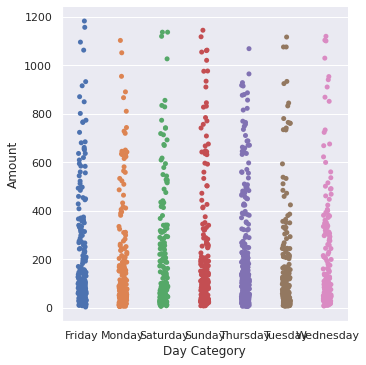

In [ ]:
p= sns.catplot(x="Day Category", y="Amount", data=data)

In [ ]:
print(data.isnull().sum())

Order ID           0
Order Date         0
CustomerName       0
State              0
City               0
Amount             0
Profit             0
Quantity           0
Category           0
Sub-Category       0
Month Category     0
Day Category       0
Amount Category    0
dtype: int64


In [ ]:
(data.isnull().sum()/len(data)).to_frame('persentase missing')

,persentase missing
Order ID,0.0
Order Date,0.0
CustomerName,0.0
State,0.0
City,0.0
Amount,0.0
Profit,0.0
Quantity,0.0
Category,0.0
Sub-Category,0.0


In [ ]:
data.describe()

,Amount,Profit,Quantity
count,1427.000000,1427.000000,1427.000000
mean,207.878066,9.363700,3.628591
std,243.378264,102.169202,2.093728
min,4.000000,-916.000000,1.000000
25%,44.000000,-9.000000,2.000000
50%,108.000000,8.000000,3.000000
75%,264.000000,33.000000,5.000000
max,1183.000000,568.000000,14.000000


In [ ]:
data.describe(include='all')

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,Month Category,Day Category,Amount Category
count,1427,1427,1427,1427,1427,1427.000000,1427.000000,1427.000000,1427,1427,1427,1427,1427
unique,487,302,324,19,24,NaN,NaN,NaN,3,17,24,7,3
top,B-26056,2019-10-03 00:00:00,Abhishek,Madhya Pradesh,Indore,NaN,NaN,NaN,Clothing,Saree,01-2019,Thursday,Rendah
freq,12,31,24,319,252,NaN,NaN,NaN,935,206,154,274,717
first,NaN,2018-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-12-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,207.878066,9.363700,3.628591,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,243.378264,102.169202,2.093728,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,4.000000,-916.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,44.000000,-9.000000,2.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
for col in data_cat.columns:
    print(col,': ', set(data[col].unique()))

CustomerName :  {'Apoorva', 'Komal', 'Preksha', 'Shivangi', 'Aditya', 'Apsingekar', 'Jesslyn', 'Parin', 'Akshay', 'Muskan', 'Kalyani', 'Ashvini', 'Nikhil', 'Gunjan', 'Chetan', 'Kritika', 'Soumya', 'Nishant', 'Kiran', 'Seema', 'Jay', 'Pinky', 'Shivani', 'Manisha', 'Ginny', 'Sweta', 'Paromita', 'Phalguni', 'Divsha', 'Shatayu', 'Ankur', 'Geetanjali', 'Mhatre', 'Sajal', 'Kajal', 'Mohan', 'Vaibhavi', 'Shyam', 'Kartik', 'Mansi', 'Nitant', 'Parakh', 'Suraj', 'Kishwar', 'Mousam', 'Mugdha', 'Lisha', 'Pearl', 'Syed', 'Shreya', 'Soodesh', 'Pratiksha', 'Aniket', 'Prashant', 'Aayush', 'Riya', 'Mukesh', 'Kshitij', 'Anurag', 'Shweta', 'Aryan', 'Anand', 'Piyali', 'Navdeep', 'Akshata', 'Sidharth', 'Aparajita', 'Ashmi', 'Dipali', 'Tanushree', 'Sonal', 'Trupti', 'Ramesh', 'Ayush', 'Saloni', 'Farah', 'Sanjna', 'Ameesha', 'Yaanvi', 'Vineet', 'Utkarsh', 'Ishit', 'Nripraj', 'Manibalan', 'Pournamasi', 'Daksh', 'Yash', 'Abhijit', 'Ritu', 'Sudheer', 'Parth', 'Mahima', 'Surabhi', 'Aditi', 'Bhavna', 'Bhutekar', '

In [ ]:
data['State'].value_counts()

Madhya Pradesh       319
Maharashtra          275
Gujarat               83
Rajasthan             72
Delhi                 71
Uttar Pradesh         63
West Bengal           61
Bihar                 61
Punjab                57
Karnataka             51
Jammu and Kashmir     48
Goa                   43
Kerala                42
Nagaland              42
Andhra Pradesh        39
Himachal Pradesh      27
Haryana               25
Sikkim                24
Tamil Nadu            24
Name: State, dtype: int64

In [ ]:
data['Category'].value_counts()

Clothing       935
Electronics    277
Furniture      215
Name: Category, dtype: int64

In [ ]:
data['Sub-Category'].value_counts()

Saree               206
Hankerchief         198
Stole               192
T-shirt              77
Phones               73
Electronic Games     73
Furnishings          73
Accessories          69
Shirt                69
Chairs               68
Bookcases            65
Skirt                64
Printers             62
Leggings             53
Kurti                47
Trousers             29
Tables                9
Name: Sub-Category, dtype: int64

In [ ]:
data['Month Category'].value_counts()

01-2019    154
08-2018    145
03-2019    135
11-2018    111
10-2018    105
06-2018     94
04-2018     87
05-2018     83
09-2018     75
07-2018     69
02-2019     62
12-2018     49
01-2018     43
03-2018     39
10-2019     34
04-2019     24
08-2019     23
05-2019     19
09-2019     18
02-2018     15
06-2019     15
07-2019     14
11-2019     11
12-2019      3
Name: Month Category, dtype: int64

In [ ]:
data['Day Category'].value_counts()

Thursday     274
Friday       220
Sunday       215
Monday       198
Tuesday      190
Saturday     179
Wednesday    151
Name: Day Category, dtype: int64

In [ ]:
CT = pd.crosstab(index=data["Category"], columns=data["State"])
CT

State,Andhra Pradesh,Bihar,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Nagaland,Punjab,Rajasthan,Sikkim,Tamil Nadu,Uttar Pradesh,West Bengal
Category,,,,,,,,,,,,,,,,,,,
Clothing,25,37,45,34,63,13,16,25,35,24,211,175,29,39,42,17,17,47,41
Electronics,10,18,12,6,9,4,7,11,10,8,49,60,10,13,19,6,3,9,13
Furniture,4,6,14,3,11,8,4,12,6,10,59,40,3,5,11,1,4,7,7


In [ ]:
CT = pd.crosstab(index=data["Category"], columns=data["Day Category"])
CT

Day Category,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Category,,,,,,,
Clothing,134,142,113,137,183,126,100
Electronics,49,35,34,45,54,35,25
Furniture,37,21,32,33,37,29,26


In [ ]:
CT = pd.crosstab(index=data["Category"], columns=data["Month Category"])
CT

Month Category,01-2018,01-2019,02-2018,02-2019,03-2018,03-2019,04-2018,04-2019,05-2018,05-2019,06-2018,06-2019,07-2018,07-2019,08-2018,08-2019,09-2018,09-2019,10-2018,10-2019,11-2018,11-2019,12-2018,12-2019
Category,,,,,,,,,,,,,,,,,,,,,,,,
Clothing,29,96,5,40,28,96,56,15,51,10,64,10,44,9,90,17,50,13,63,24,88,7,28,2
Electronics,10,33,5,10,7,26,18,3,16,6,19,4,12,2,33,3,13,1,21,8,10,2,14,1
Furniture,4,25,5,12,4,13,13,6,16,3,11,1,13,3,22,3,12,4,21,2,13,2,7,0


In [ ]:
CT = pd.crosstab(index=data["Day Category"], columns=data["State"])
CT

State,Andhra Pradesh,Bihar,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Nagaland,Punjab,Rajasthan,Sikkim,Tamil Nadu,Uttar Pradesh,West Bengal
Day Category,,,,,,,,,,,,,,,,,,,
Friday,1,7,12,17,16,0,8,13,5,2,55,23,4,7,8,1,7,17,17
Monday,11,0,7,0,23,3,1,5,5,14,37,45,14,6,12,1,4,8,2
Saturday,0,15,8,3,15,1,0,3,9,5,33,50,0,1,14,4,9,5,4
Sunday,1,14,4,16,9,2,3,6,1,16,65,17,17,3,14,1,0,11,15
Thursday,2,14,14,2,6,3,2,11,20,5,69,63,3,8,15,9,3,17,8
Tuesday,4,11,14,5,5,9,9,10,4,0,44,42,1,17,2,4,0,3,6
Wednesday,20,0,12,0,9,7,4,0,7,0,16,35,3,15,7,4,1,2,9


In [ ]:
CT = pd.crosstab(index=data["Amount Category"], columns=data["State"])
CT

State,Andhra Pradesh,Bihar,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Nagaland,Punjab,Rajasthan,Sikkim,Tamil Nadu,Uttar Pradesh,West Bengal
Amount Category,,,,,,,,,,,,,,,,,,,
Rendah,21,37,31,28,47,12,15,24,24,14,170,132,19,26,27,10,13,38,29
Sedang,7,13,21,8,21,5,6,11,13,20,71,60,13,19,22,7,5,12,20
Tinggi,11,11,19,7,15,8,6,13,14,8,78,83,10,12,23,7,6,13,12


In [ ]:
CT = pd.crosstab(index=data["Amount Category"], columns=data["Category"])
CT

Category,Clothing,Electronics,Furniture
Amount Category,,,
Rendah,630,41,46
Sedang,202,80,72
Tinggi,103,156,97


In [ ]:
CT = pd.crosstab(index=data["Amount Category"], columns=data["Sub-Category"])
CT

Sub-Category,Accessories,Bookcases,Chairs,Electronic Games,Furnishings,Hankerchief,Kurti,Leggings,Phones,Printers,Saree,Shirt,Skirt,Stole,T-shirt,Tables,Trousers
Amount Category,,,,,,,,,,,,,,,,,
Rendah,20,2,16,11,28,159,36,53,10,0,86,42,64,132,54,0,4
Sedang,30,16,23,18,33,31,10,0,23,9,58,24,0,50,20,0,9
Tinggi,19,47,29,44,12,8,1,0,40,53,62,3,0,10,3,9,16


In [ ]:
data.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,Month Category,Day Category,Amount Category
1,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole,01-2018,Thursday,Rendah
2,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief,01-2018,Thursday,Rendah
3,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games,01-2018,Thursday,Rendah
4,B-25602,2018-01-04,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones,01-2018,Thursday,Sedang
5,B-25602,2018-01-04,Pearl,Maharashtra,Pune,424.0,-272.0,5,Electronics,Phones,01-2018,Thursday,Tinggi


In [ ]:
# Saving the preprocessed Data for future use/analysis
data.to_csv("data_PreProcessed.csv", encoding='utf8')

In [ ]:
from google.colab import files
files.download("data_PreProcessed.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Visualisasi


*   Afdhal Rezeki
*   Hanun Hanifah
*   Retsya Lapiza





In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_PreProcessed (2).csv to data_PreProcessed (2).csv


In [ ]:
# Importing Some Python Modules
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from collections import Counter
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [ ]:
data = pd.read_csv('data_PreProcessed (2).csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1427 non-null   int64  
 1   Order ID         1427 non-null   object 
 2   Order Date       1427 non-null   object 
 3   CustomerName     1427 non-null   object 
 4   State            1427 non-null   object 
 5   City             1427 non-null   object 
 6   Amount           1427 non-null   float64
 7   Profit           1427 non-null   float64
 8   Quantity         1427 non-null   int64  
 9   Category         1427 non-null   object 
 10  Sub-Category     1427 non-null   object 
 11  Month Category   1427 non-null   object 
 12  Day Category     1427 non-null   object 
 13  Amount Category  1427 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 156.2+ KB


In [ ]:
data.drop("Unnamed: 0",axis=1,inplace=True)
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['City'] = data['City'].astype('category')
data['CustomerName'] = data['CustomerName'].astype('category')
data['State'] = data['State'].astype('category')
data["Category"]=data["Category"].astype('category')
data["Sub-Category"]=data["Sub-Category"].astype('category')
data["Month Category"]=data["Month Category"].astype('category')
data["Day Category"]=data["Day Category"].astype('category')
data["Amount Category"]=data["Amount Category"].astype('category')
data.dtypes

Order ID                   object
Order Date         datetime64[ns]
CustomerName             category
State                    category
City                     category
Amount                    float64
Profit                    float64
Quantity                    int64
Category                 category
Sub-Category             category
Month Category           category
Day Category             category
Amount Category          category
dtype: object

Jumlah Transaksi per Bulan

In [ ]:
data2['Month'] =pd.DataFrame(data2["Order Date"])
data2['Month'] =pd.DatetimeIndex(data2['Order Date']).strftime('%Y-%m')

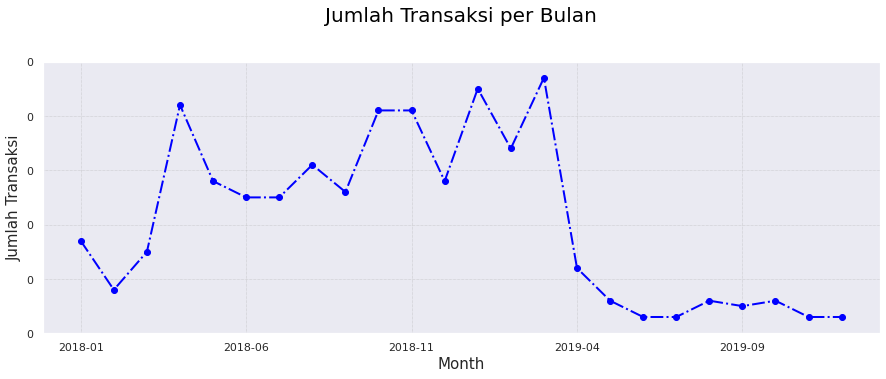

In [ ]:
#menggunakan data yg mengandung outlier
fig = plt.figure(figsize=(15, 5))
data2.groupby(['Month'])['Order ID'].nunique().plot(color='blue', marker='o', linestyle='-.', linewidth=2)
plt.title('Jumlah Transaksi per Bulan', loc='center', pad=40, fontsize=20, color='black')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Jumlah Transaksi', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

Total Nilai Transaksi Per Bulan

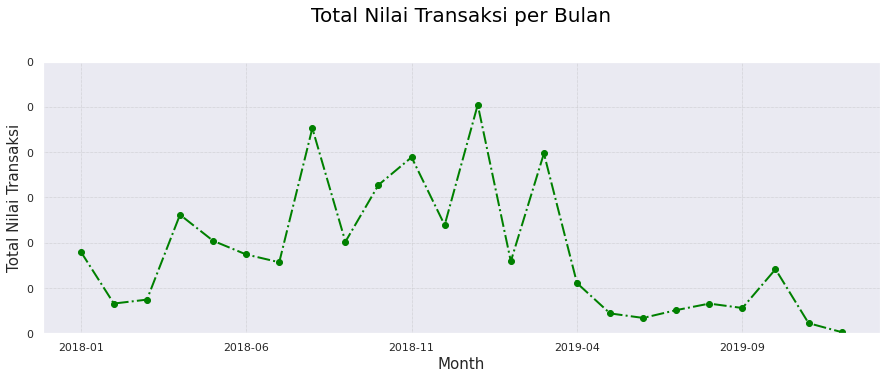

In [ ]:
#menggunakan data yg mengandung outlier
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))
data2.groupby(['Month'])['Amount'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Total Nilai Transaksi per Bulan', loc='center', pad=40, fontsize=20, color='black')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Total Nilai Transaksi', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

Total Penjualan Berdasarkan Category

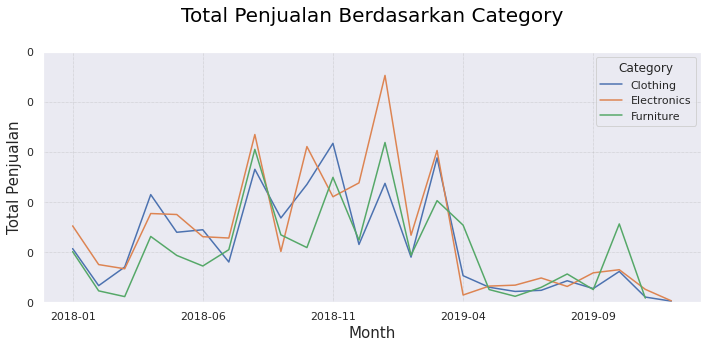

In [ ]:
#Menggunakan data yang mengandung outlier
data2.groupby(['Month','Category'])['Amount'].sum().unstack().plot()
plt.title('Total Penjualan Berdasarkan Category', loc='center', pad=30, fontsize=20, color='black')
plt.xlabel('Month',fontsize=15)
plt.ylabel('Total Penjualan',fontsize=15)
plt.grid(color='darkgray', linestyle=':',linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

In [ ]:
data_cat = data.select_dtypes(include =['category'])
data_num = data.select_dtypes(include =['float64','int64'])

In [ ]:
datamonth18=data['Month Category']
datamonth19=data['Month Category']
datamonth18= datamonth18.cat.remove_categories(['January-19','February-19','March-19','April-19','May-19','June-19','July-19','August-19','September-19','October-19','November-19','December-19'])
datamonth19= datamonth19.cat.remove_categories(['January-18','February-18','March-18','April-18','May-18','June-18','July-18','August-18','September-18','October-18','November-18','December-18'])
datamonth18.dropna(inplace=True)
datamonth19.dropna(inplace=True)

In [ ]:
print(datamonth18.isnull().sum())
print(datamonth19.isnull().sum())

0
0


In [ ]:
dm18=pd.DataFrame(datamonth18)
dm18

,Month Category
0,January-18
1,January-18
2,January-18
3,January-18
4,January-18
...,...
910,December-18
911,December-18
912,December-18
913,December-18


In [ ]:
dm19=pd.DataFrame(datamonth19)
dm19

,Month Category
915,January-19
916,January-19
917,February-19
918,February-19
919,March-19
...,...
1422,March-19
1423,March-19
1424,March-19
1425,March-19


In [ ]:
dm18=dm18.rename(columns={"Month Category": "Months in 2018"})
dm19=dm19.rename(columns={"Month Category": "Months in 2019"})
data2018 = pd.concat([data,dm18], axis = 1)
data2018.dropna(inplace=True)
data2018.drop("Month Category",axis=1,inplace=True)
data2019 = pd.concat([data,dm19], axis = 1)
data2019.dropna(inplace=True)
data2019.drop("Month Category",axis=1,inplace=True)

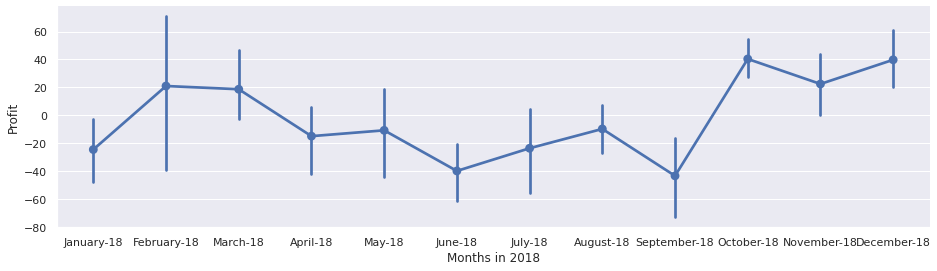

In [ ]:
#Point Chart Profit di bulan-bulan pada tahun 2018
p=sns.catplot(data=data2018, x="Months in 2018", y="Profit",order=['January-18','February-18','March-18','April-18','May-18','June-18','July-18','August-18','September-18','October-18','November-18','December-18'],height=3.7,aspect=3.5,kind="point")

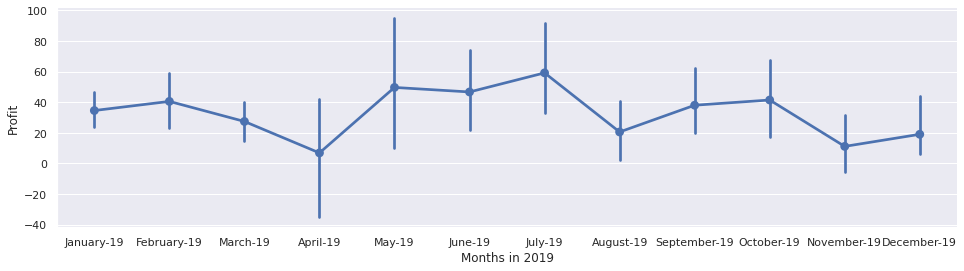

In [ ]:
#Point Chart Profit di bulan-bulan pada tahun 2019
p=sns.catplot(data=data2019, x="Months in 2019", y="Profit",order=['January-19','February-19','March-19','April-19','May-19','June-19','July-19','August-19','September-19','October-19','November-19','December-19'],height=3.7,aspect=3.6,kind="point")

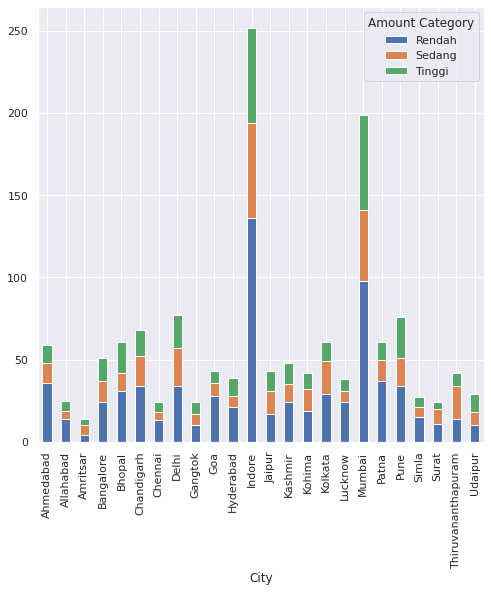

In [ ]:
#Stacked Chart untuk Profit dan Kategori Total Perbelanjaan
CT = pd.crosstab(index=data["City"], columns=data["Amount Category"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)

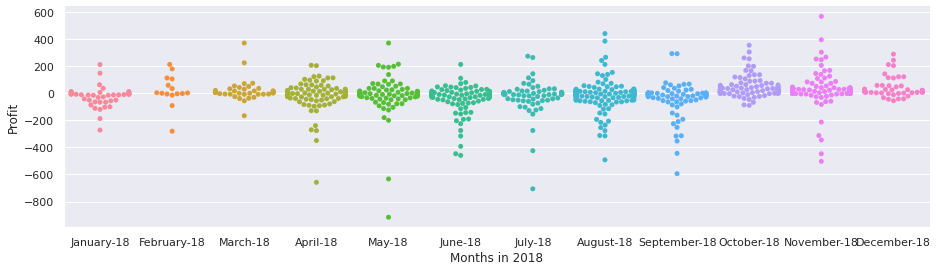

In [ ]:
#Swarm Plot untuk Profit di bulan-bulan pada tahun 2018
p=sns.catplot(data=data2018, x="Months in 2018", y="Profit",order=['January-18','February-18','March-18','April-18','May-18','June-18','July-18','August-18','September-18','October-18','November-18','December-18'],height=3.7,aspect=3.5,kind="swarm")

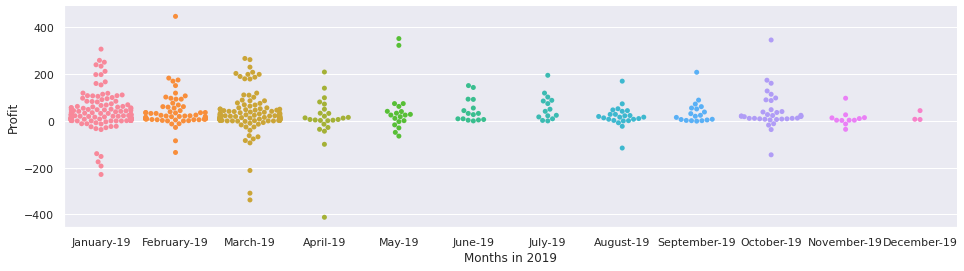

In [ ]:
#Swarm Plot untuk Profit di bulan-bulan pada tahun 2019
p=sns.catplot(data=data2019, x="Months in 2019", y="Profit",order=['January-19','February-19','March-19','April-19','May-19','June-19','July-19','August-19','September-19','October-19','November-19','December-19'],height=3.7,aspect=3.6,kind="swarm")

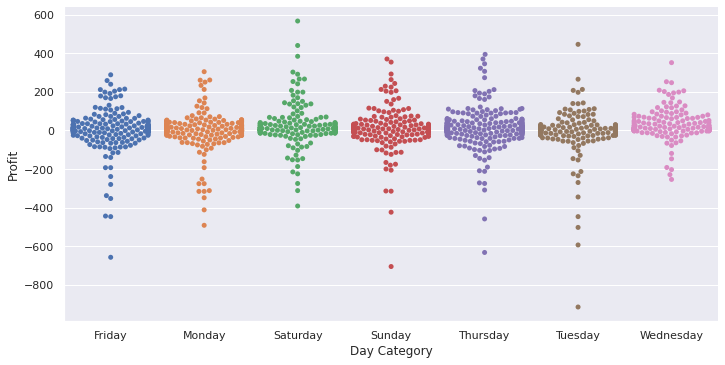

In [ ]:
#Swarm Plot untuk Profit per Hari
p= sns.catplot(x="Day Category", y="Profit", kind="swarm",height=5,aspect=2,data=data)

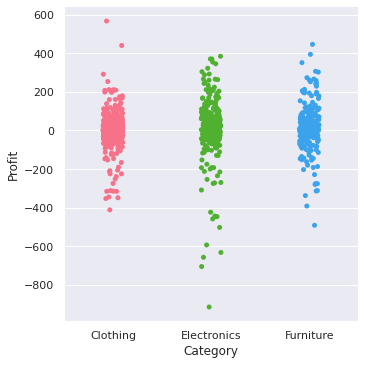

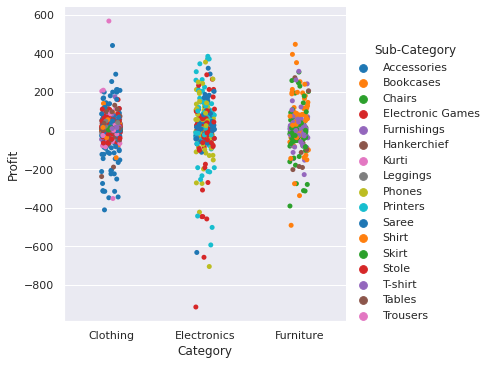

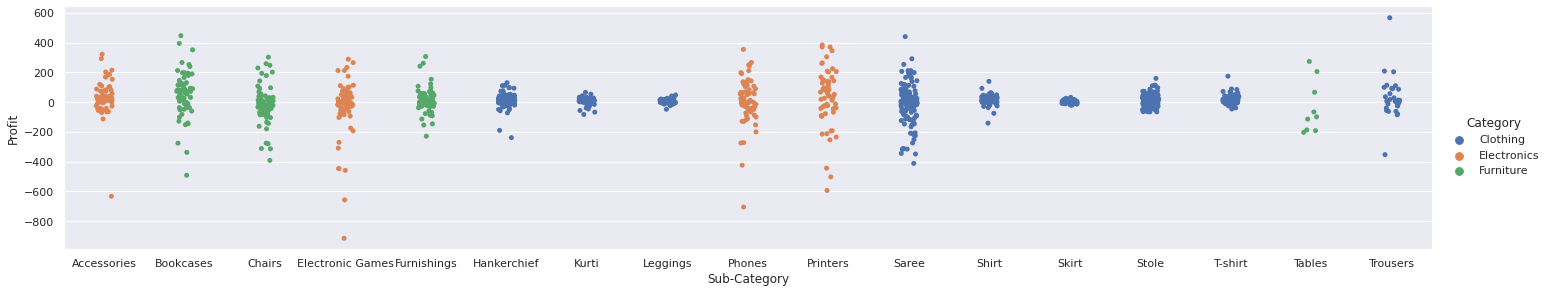

In [ ]:
#Swarm Plot untuk Profit dari Kategori Barang
p= sns.catplot( x="Category", y="Profit", palette ="husl", data = data)
#Detail Swarm Plot untuk Profit dari Sub-Kategori Barang
p= sns.catplot( x="Category", y="Profit", hue ="Sub-Category", palette ="tab10", data = data)
p= sns.catplot( x="Sub-Category", y="Profit",hue ="Category", height= 4, aspect =5, data = data)

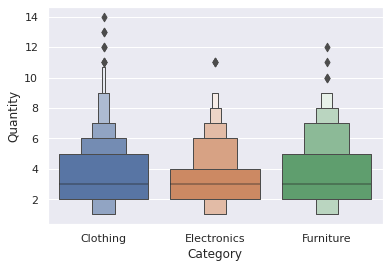

In [ ]:
#Boxen Plot antara Kategori Barang dengan jumlah perbelanjaan
sns.boxenplot(x='Category',y='Quantity',data=data)

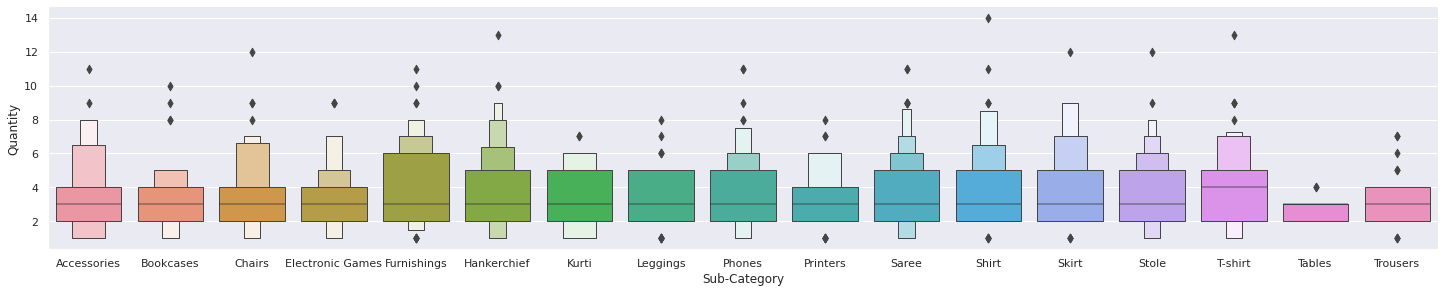

In [ ]:
#Boxen Plot antara Sub-Kategori Barang dengan jumlah perbelanjaan
sns.catplot(x='Sub-Category',y='Quantity',kind="boxen",height=4, aspect=5,data=data)

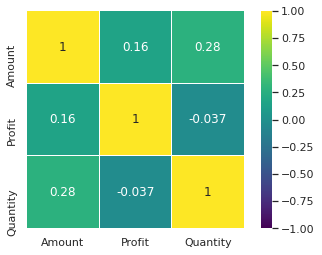

In [ ]:
# Korelasi antar variabel
corr = data.corr()
c = sns.heatmap(corr, cmap='viridis', vmax=1, vmin= -1, linewidths=0.1, annot=True, square= True);

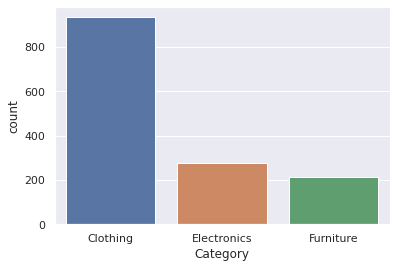

In [ ]:
# BarPlot kategori barang yang dipesan
p = sns.countplot(x = "Category", data = data);

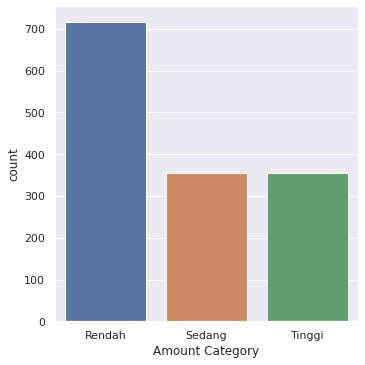

In [ ]:
# BarPlot kategori jumlah
p = sns.catplot(x = "Amount Category", data = data, kind='count')

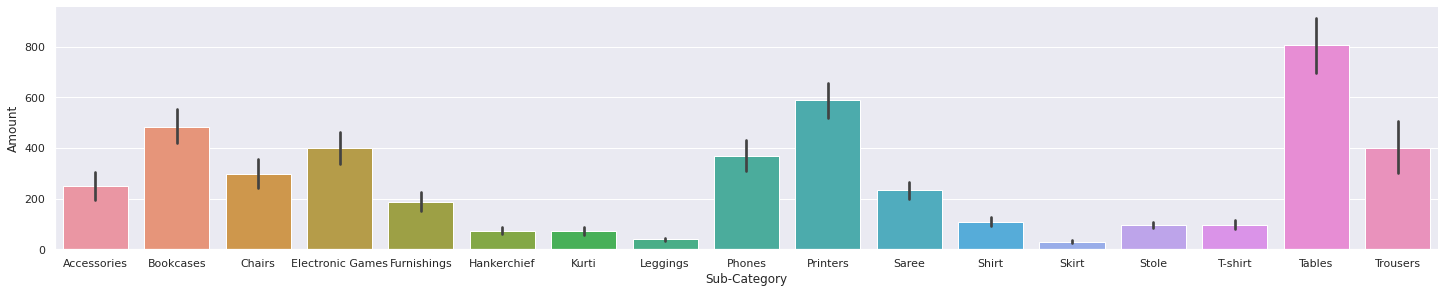

In [ ]:
# BarPlot jumlah harga terhadap setiap sub-kategori barang
p = sns.catplot(x="Sub-Category", y="Amount",data=data, kind="bar", height=4, aspect=5)

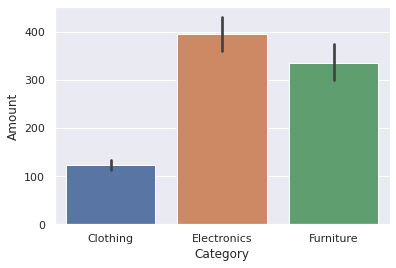

In [ ]:
# BarPlot jumlah harga terhadap setiap kategori barang
p = sns.barplot(y = "Amount", x = "Category", data = data);

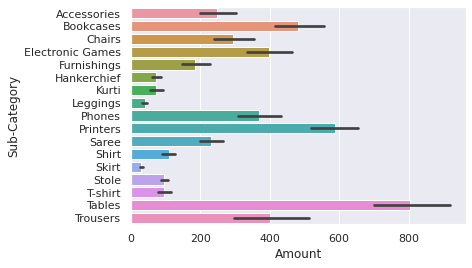

In [ ]:
# BarPlot jumlah harga terhadap setiap sub-kategori barang
p = sns.barplot(x = "Amount", y = "Sub-Category", data = data);

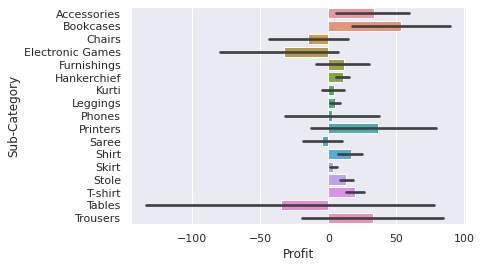

In [ ]:
# BarPlot profit yang dihasilkan terhadap sub-kategori barang
p = sns.barplot(x= "Profit", y = "Sub-Category", data = data)

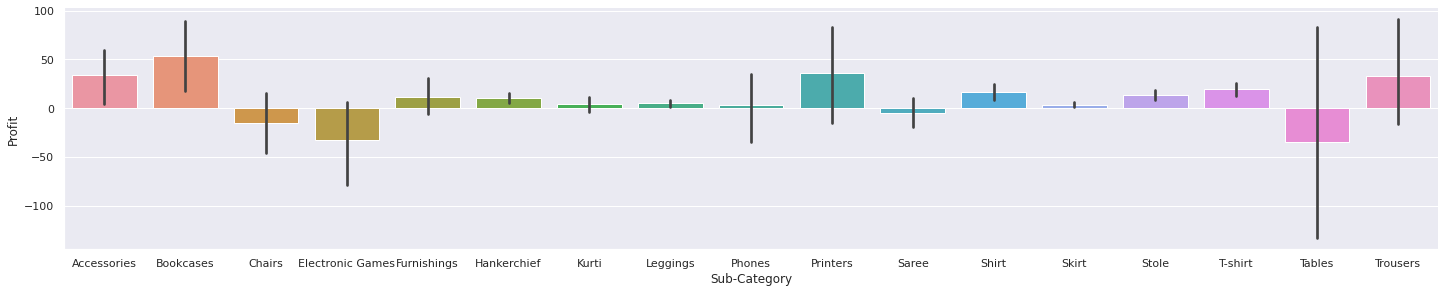

In [ ]:
#Bar Plot Profit dari Sub-Kategori Barang
p = sns.catplot(x="Sub-Category", y="Profit",data=data, kind="bar", height=4, aspect=5)

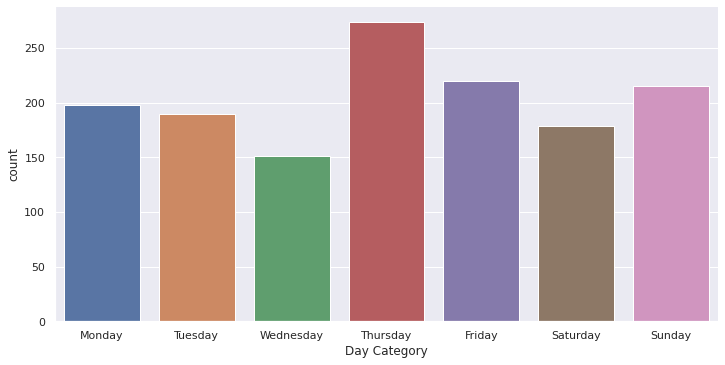

In [ ]:
# BarPlot jumlah barang yang dibeli setiap harinya
p = sns.catplot(x = "Day Category", order=('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                                           'Saturday','Sunday'), data = data, kind='count',aspect= 2)

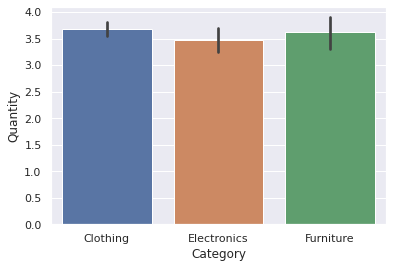

In [ ]:
# BarPlot jumlah barang yang dibeli terhadap kategori barang
p = sns.barplot(y = "Quantity", x = "Category", data = data);

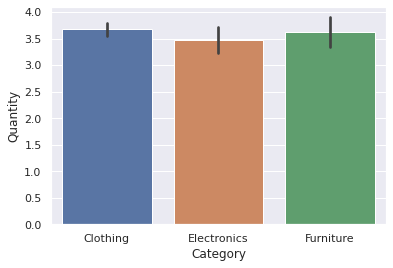

In [ ]:
# BarPlot jumlah barang yang dibeli terhadap kategori barang
p = sns.barplot(y = "Quantity", x = "Category", data = data);

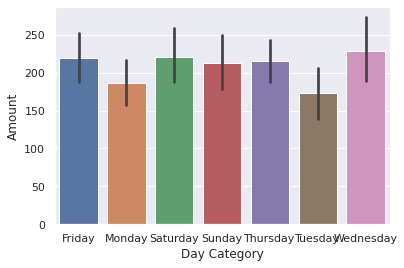

In [ ]:
# BarPlot jumlah harga yang diperoleh setiap harinya
p = sns.barplot(y = "Amount", x = "Day Category", data = data);

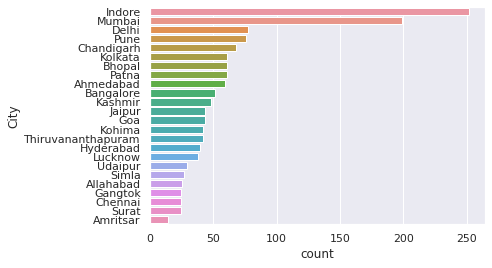

In [ ]:
# barplot kota yang melakukan pemebelian
p = sns.countplot(y = "City", data = data ,order = data['City'].value_counts().index);

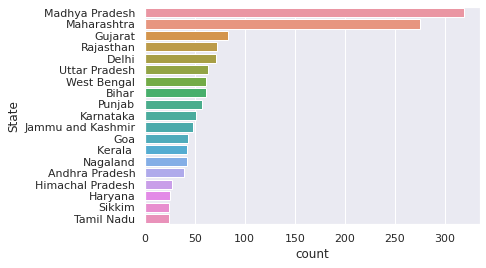

In [ ]:
# Barplot negara bagian yang melakukan pembelian
p = sns.countplot(y = "State", data = data ,order = data['State'].value_counts().index);

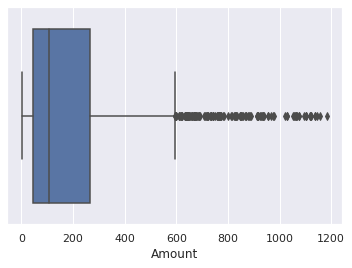

In [ ]:
#Box Plot Total Perbelanjaan
p = sns.boxplot(data['Amount'])

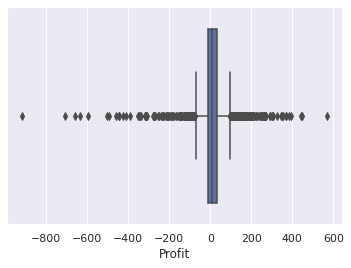

In [ ]:
#Box Plot Profit
p = sns.boxplot(data['Profit'])

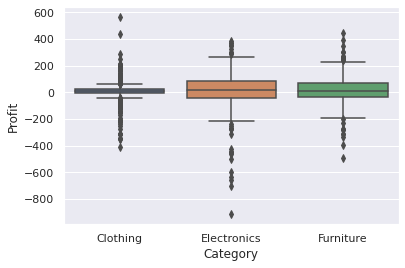

In [ ]:
#Box Plot Kategori Barang dan Profit
p = sns.boxplot(y = "Profit", x = "Category", data=data)

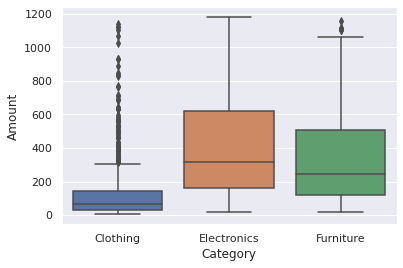

In [ ]:
#Box Plot Kategori Barang dan Total Perbelanjaan
p = sns.boxplot(y = "Amount", x = "Category", data=data)

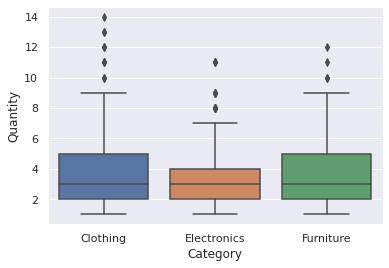

In [ ]:
#Box Plot Jumlah Barang yang dibeli dan Kategori Barang Perbelanjaan
p = sns.boxplot(y = "Quantity", x = "Category", data=data)

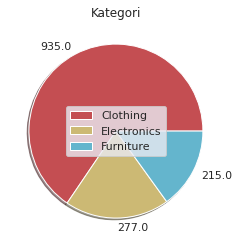

In [ ]:
#Pie Chart Kategori Barang
piechart=data["Category"]

proporsion = Counter(piechart)
values = [float(v) for v in proporsion.values()]
colors = ['r', 'y', 'c']
labels = proporsion.keys()
explode = (0, 0, 0)
plt.pie(values, colors=colors, labels= values, explode=explode, shadow=True)
plt.title('Kategori')
plt.legend(labels,loc='center')
plt.show()


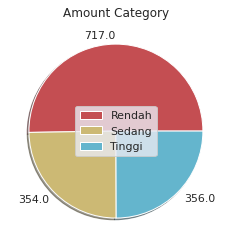

In [ ]:
#Pie Chart Kategory Total Perbelanjaan
piechart=data["Amount Category"]

proporsion = Counter(piechart)
values = [float(v) for v in proporsion.values()]
colors = ['r', 'y', 'c']
labels = proporsion.keys()
explode = (0, 0, 0)
plt.pie(values, colors=colors, labels= values, explode=explode, shadow=True)
plt.title('Amount Category')
plt.legend(labels,loc='center')
plt.show()

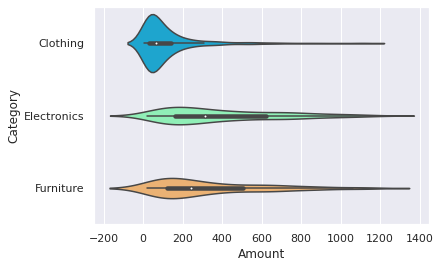

In [ ]:
#Violin Plot Total Perbelanjaan dan Kategori Barang
p = sns.violinplot(x="Amount", y="Category", data=data,palette='rainbow')

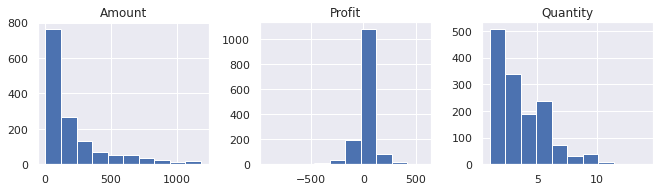

In [ ]:
#Histogram Data Numerik
numerical = data.select_dtypes(include = ['int64','float64']).columns

data[numerical].hist(figsize=(15, 6), layout=(2, 4));

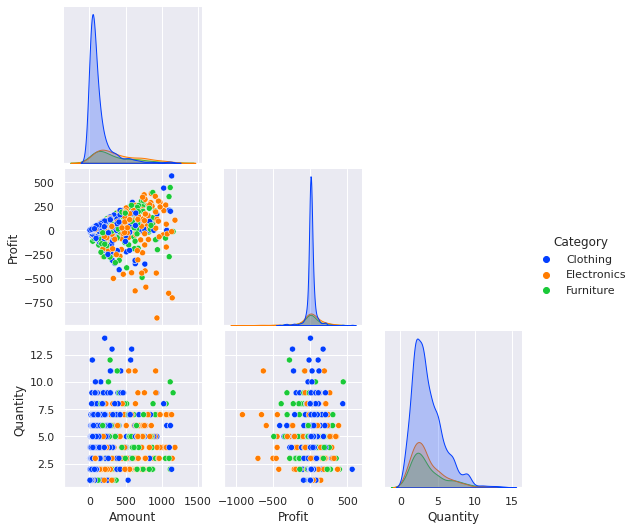

In [ ]:
#Pair Plot Kategori
p = sns.pairplot(data, palette='bright' ,hue="Category", corner =True)

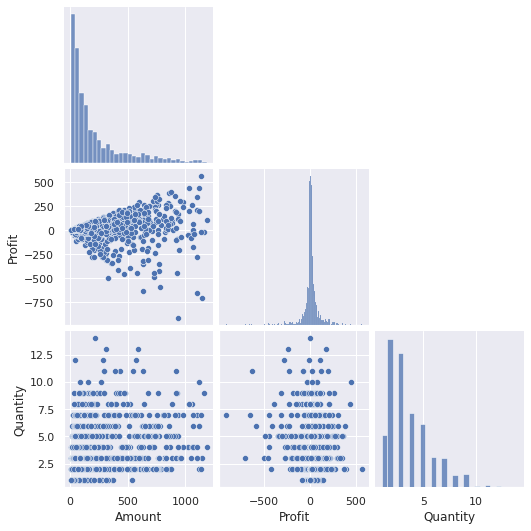

In [ ]:
#Pair Plot Data Numerik
p = sns.pairplot(data_num, corner= True)

(0.0, 642.2)

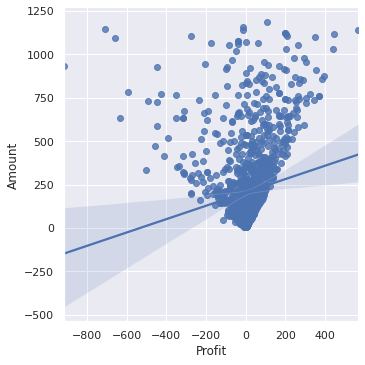

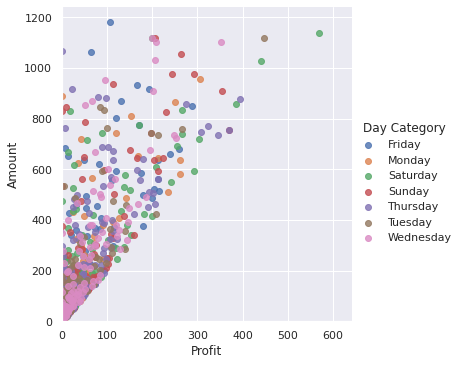

In [ ]:
#Perbandingan antara data numerik Total Perbelanjaan dengan Profit
sns.lmplot(x='Profit', y='Amount', data=data)
# Plot using Seaborn
sns.lmplot(x='Profit', y='Amount', data=data,
           fit_reg=False, 
           hue='Day Category')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

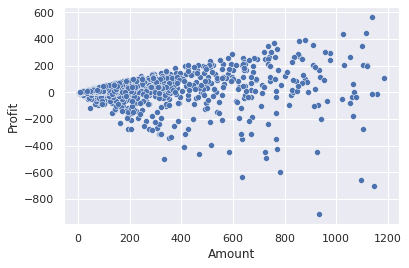

In [ ]:
#Scatter Plot Profit dan Total Perbelanjaan
sns.scatterplot(x=data['Amount'], y=data['Profit'])

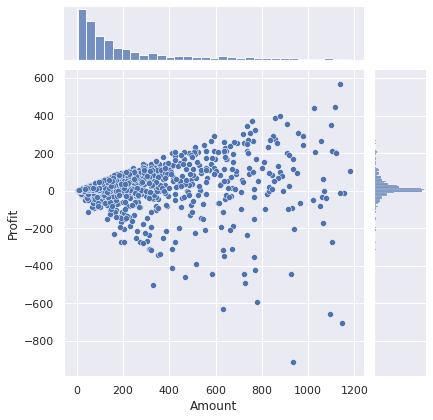

In [ ]:
#Joint Plot Total Perbelanjaan dan Profit
sns.jointplot(x=data['Amount'], y=data['Profit'])

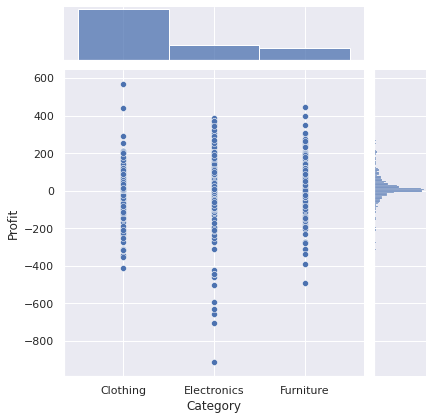

In [ ]:
#Joint Plot Kategori Barang dan Profit
p = sns.jointplot(x=data['Category'], y=data['Profit'])

# Clustering



*   Akira Andriani
*   Ervaran P. Putra
*   Tamara Prihutaminingsih





In [ ]:
#Menyiapkan Tabel RFM
data_rfm = data[['Order ID','Order Date','CustomerName','Amount']]
data_rfm.head()

,Order ID,Order Date,CustomerName,Amount
1,B-25601,2018-01-04,Bharat,66.0
2,B-25601,2018-01-04,Bharat,8.0
3,B-25601,2018-01-04,Bharat,80.0
4,B-25602,2018-01-04,Pearl,168.0
5,B-25602,2018-01-04,Pearl,424.0


In [ ]:
#melihat tanggal terbaru dan terlama
data_rfm['Order Date'].min(),data_rfm['Order Date'].max()

(Timestamp('2018-01-04 00:00:00'), Timestamp('2019-12-03 00:00:00'))

In [ ]:
import datetime as dt
present = dt.datetime(2019, 12, 4)

In [ ]:
#Tabel RFM
rfm= data_rfm.groupby('CustomerName').agg({'Order Date': lambda date: (present - date.max()).days,
                                        'Order ID':'count',
                                        'Amount': 'sum'})
rfm.head()

,Order Date,Order ID,Amount
CustomerName,,,
Aakanksha,696,2,74.0
Aarushi,257,11,3337.0
Aashna,601,7,1931.0
Aastha,404,5,1322.0
Aayush,384,6,556.0


In [ ]:
#mengganti nama kolom
rfm.columns=['recency','frequency','monetary']
rfm['recency'] = rfm['recency'].astype(int)
rfm.head()

,recency,frequency,monetary
CustomerName,,,
Aakanksha,696,2,74.0
Aarushi,257,11,3337.0
Aashna,601,7,1931.0
Aastha,404,5,1322.0
Aayush,384,6,556.0


In [ ]:
#STANDARISASI
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

scaleddata = pd.DataFrame(scale.fit_transform(rfm), columns=rfm.columns)
scaleddata.head()

,recency,frequency,monetary
0,2.189539,-0.632752,-0.855722
1,-0.814380,1.735803,2.462183
2,1.539488,0.683112,1.032525
3,0.191488,0.156766,0.413277
4,0.054636,0.419939,-0.365612


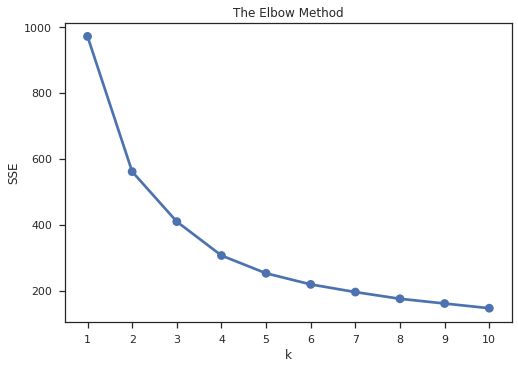

In [ ]:
#ELBOW METHOD
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaleddata)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

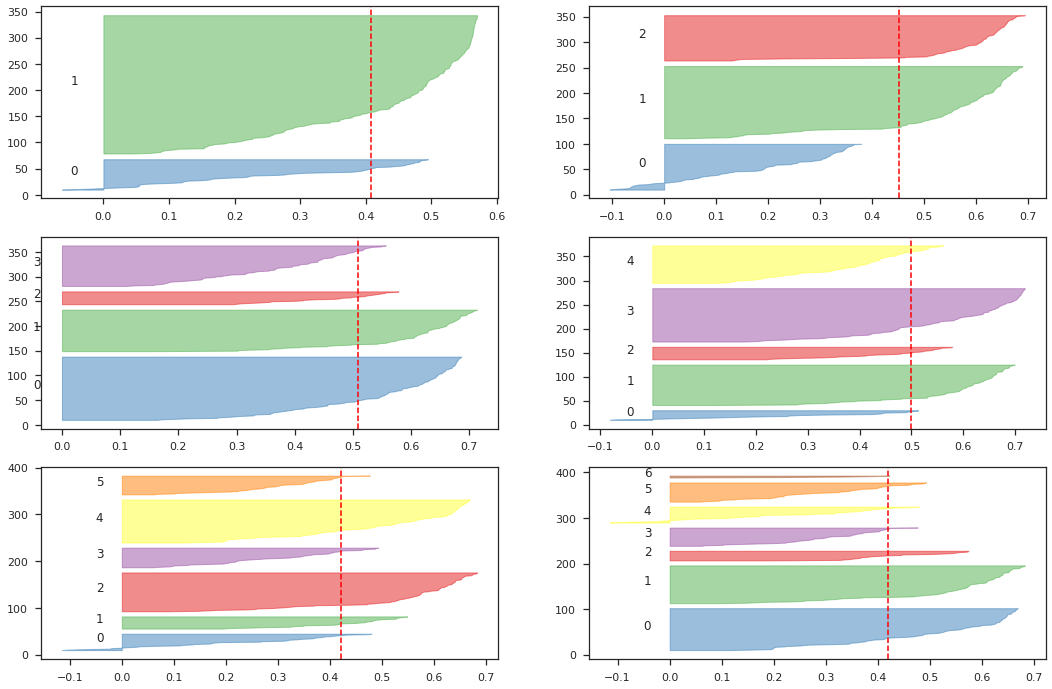

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(18,12))
for i in [2, 3, 4, 5,6,7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaleddata)

K-Means++

In [ ]:
# Importing Modules
import warnings; warnings.simplefilter('ignore')
import umap, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 

sns.set(style="ticks", color_codes=True)
random_state = 99

array([0, 3, 1, 1, 1, 2, 3, 2, 3, 0], dtype=int32)

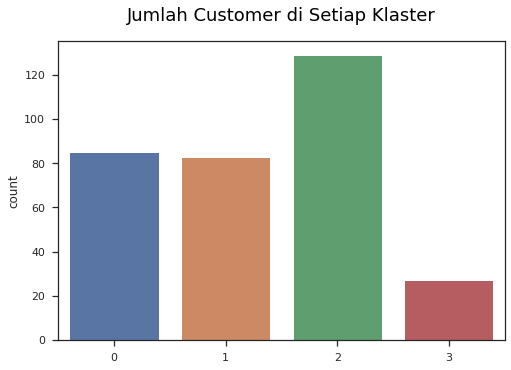

In [ ]:
#K-means
k=4
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = random_state)
kmPP.fit(scaleddata)
C_kmpp = kmPP.predict(scaleddata)

plt.title('Jumlah Customer di Setiap Klaster', loc='center', pad=20, fontsize=18, color='black')
sns.countplot(C_kmpp)
C_kmpp[:10]

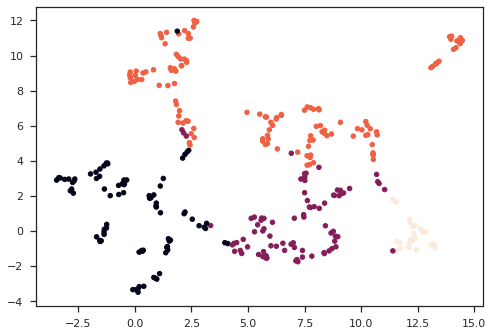

In [ ]:
#Persebaran klaster
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(scaleddata)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmpp, s=20)
plt.show()

In [ ]:
#Jumlah customer di tiap klaster
scaleddata['Cluster'] = kmPP.labels_

distdata = scaleddata['Cluster'].value_counts()
print(distdata)

2    129
0     85
1     83
3     27
Name: Cluster, dtype: int64


In [ ]:
#Rata-rata variabel di tiap klaster
rfm["Cluster"] = kmPP.labels_
rfm_cluster = rfm.groupby('Cluster').agg({
    'recency':'mean','frequency':'mean','monetary':'mean'}).round(2)
rfm_cluster

,recency,frequency,monetary
Cluster,,,
0,549.41,2.34,381.85
1,356.04,7.07,1518.96
2,299.45,2.27,384.29
3,257.37,12.89,3279.15


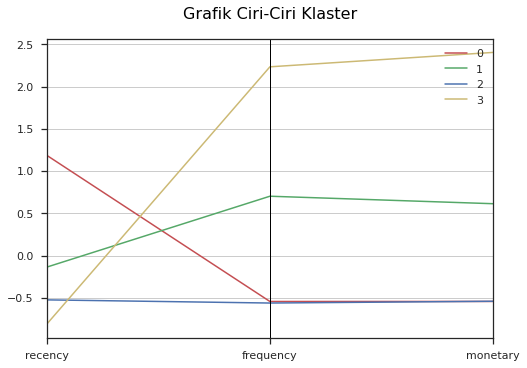

In [ ]:
#Grafik ciri2 klaster
cols = ['recency','frequency','monetary']
dfC = pd.DataFrame(kmPP.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

plt.title('Grafik Ciri-Ciri Klaster', loc='center', pad=20, fontsize=16, color='black')
pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g','b','y'))
plt.show()

In [ ]:
rfm.head()

,recency,frequency,monetary,Cluster
CustomerName,,,,
Aakanksha,696,2,74.0,0
Aarushi,257,11,3337.0,3
Aashna,601,7,1931.0,1
Aastha,404,5,1322.0,1
Aayush,384,6,556.0,1


In [ ]:
#Menggabungkan tabel awal dengan tabel rfm
dataa = pd.merge(data,rfm,on='CustomerName')
dataa.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,Month Category,Day Category,Amount Category,recency,frequency,monetary,Cluster
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole,01-2018,Thursday,Rendah,2,5,304.0,2
1,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief,01-2018,Thursday,Rendah,2,5,304.0,2
2,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games,01-2018,Thursday,Rendah,2,5,304.0,2
3,B-26011,2019-12-02,Bharat,Gujarat,Ahmedabad,93.0,44.0,2,Clothing,Stole,12-2019,Monday,Rendah,2,5,304.0,2
4,B-26074,2019-03-21,Bharat,Gujarat,Ahmedabad,57.0,21.0,4,Clothing,Leggings,03-2019,Thursday,Rendah,2,5,304.0,2


In [ ]:
dataa['Cluster'] = dataa['Cluster'].astype('str')

In [ ]:
#Memisahkan tabel berdasarkan klaster
klaster0 = dataa.loc[dataa['Cluster']=='0']
klaster1 = dataa.loc[dataa['Cluster']=='1']
klaster2 = dataa.loc[dataa['Cluster']=='2']
klaster3 = dataa.loc[dataa['Cluster']=='3']

Klaster 0

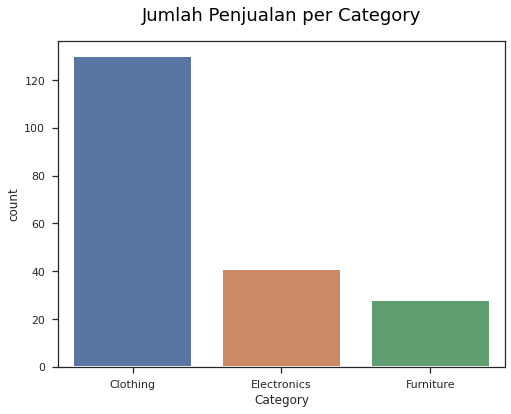

In [ ]:
#Jumlah Penjualan per Category di klaster 0
plt.figure(figsize=(8,6))
plt.title('Jumlah Penjualan per Category', loc='center', pad=20, fontsize=18, color='black')
sns.set_context("poster", font_scale=.6)
sns.countplot(klaster0['Category'])

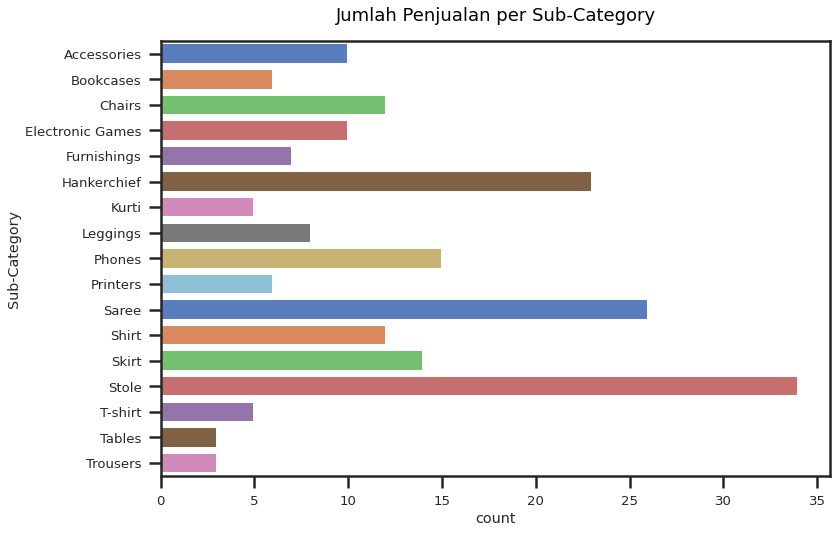

In [ ]:
#Jumlah Penjualan per Sub-Category di klaster 0
plt.figure(figsize=(12,8))
plt.title('Jumlah Penjualan per Sub-Category', loc='center', pad=20, fontsize=18, color='black')
sns.set_context("poster", font_scale=.6)
sns.countplot(y = 'Sub-Category', palette = 'muted', data=klaster0)

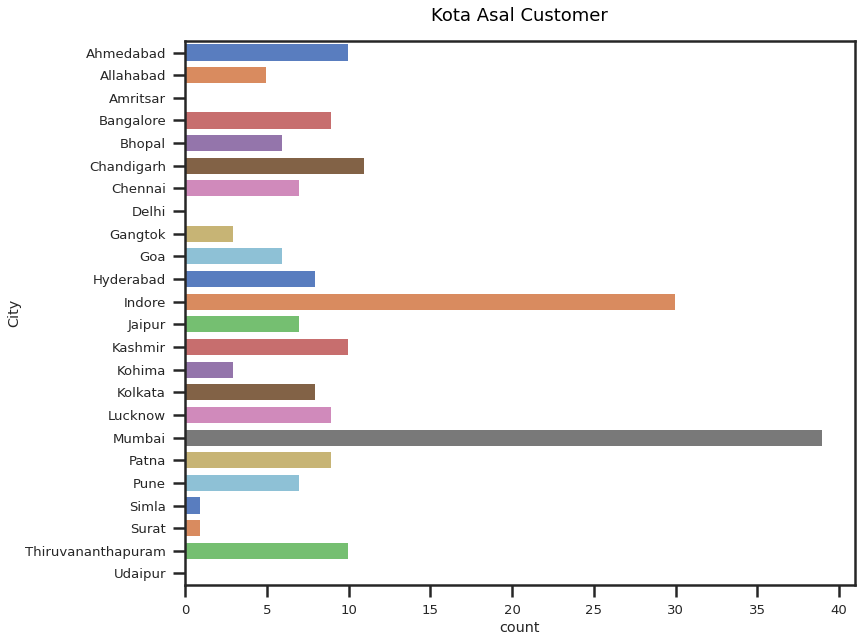

In [ ]:
#Kota Asal Customer di klaster 0
plt.figure(figsize=(12,10))
plt.title('Kota Asal Customer', loc='center', pad=20, fontsize=18, color='black')
sns.set_context("poster", font_scale=.6)
sns.countplot(y = 'City', palette = 'muted', data=klaster0)

Klaster 1

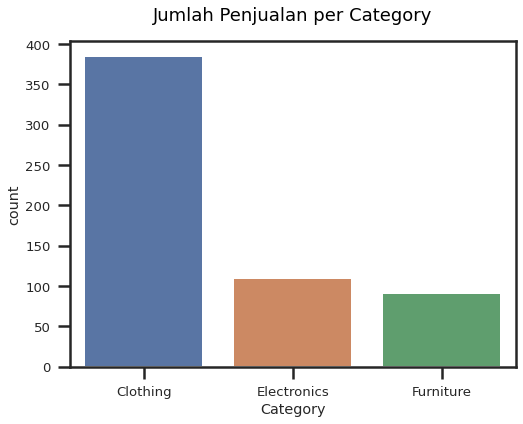

In [ ]:
#Jumlah Penjualan per Category di klaster 1
plt.figure(figsize=(8,6))
plt.title('Jumlah Penjualan per Category', loc='center', pad=20, fontsize=18, color='black')
sns.set_context("poster", font_scale=.6)
sns.countplot(klaster1['Category'])

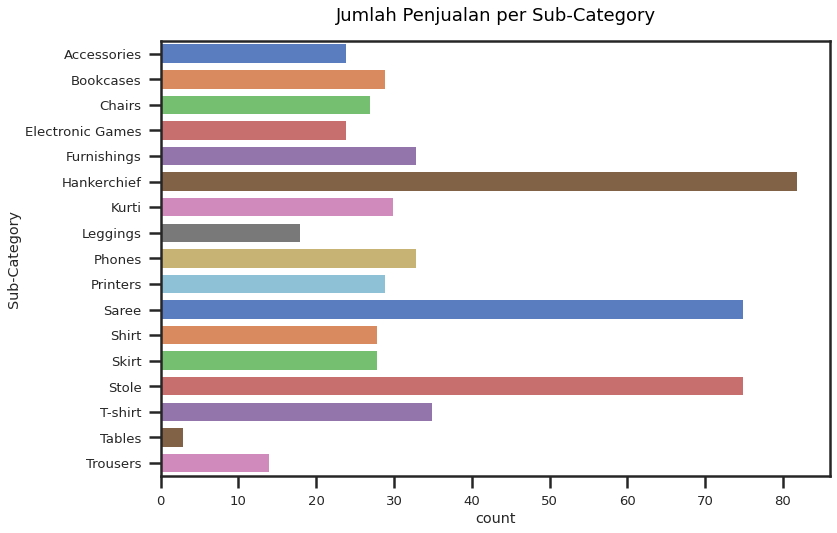

In [ ]:
#Jumlah Penjualan per Sub-Category di klaster 1
plt.figure(figsize=(12,8))
plt.title('Jumlah Penjualan per Sub-Category', loc='center', pad=20, fontsize=18, color='black')
sns.set_context("poster", font_scale=.6)
sns.countplot(y = 'Sub-Category', palette = 'muted', data=klaster1)

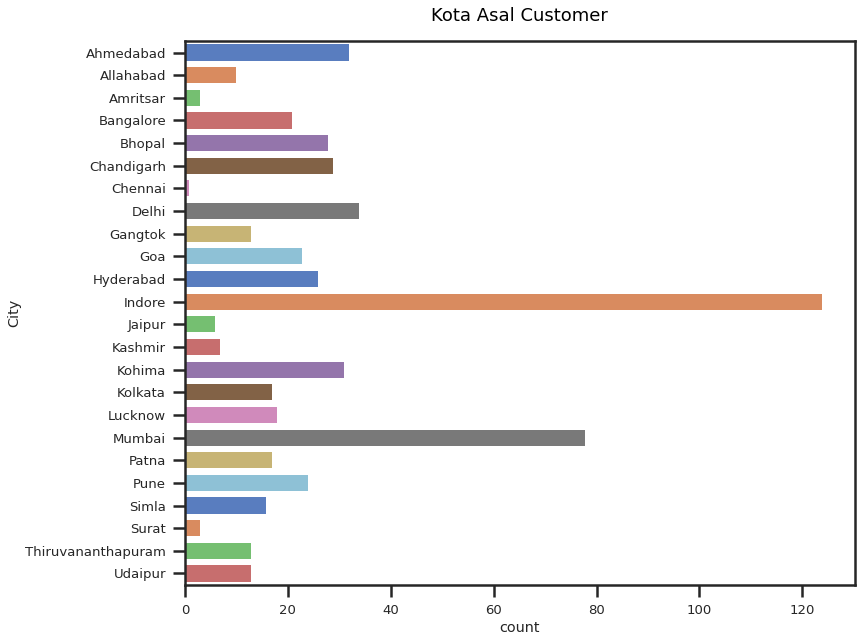

In [ ]:
#Kota Asal Customer di klaster 1
plt.figure(figsize=(12,10))
plt.title('Kota Asal Customer', loc='center', pad=20, fontsize=18, color='black')
sns.set_context("poster", font_scale=.6)
sns.countplot(y = 'City', palette = 'muted', data=klaster1)

Klaster 2

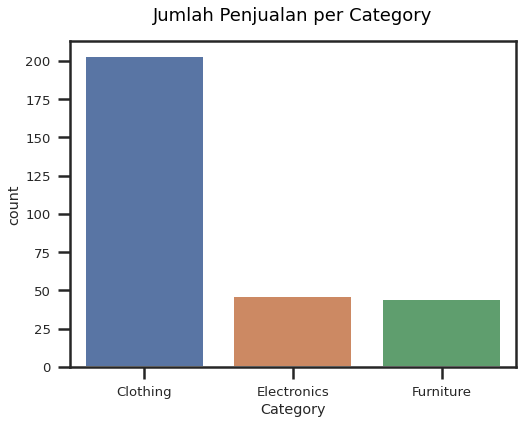

In [ ]:
#Jumlah Penjualan per Category di klaster 2
plt.figure(figsize=(8,6))
plt.title('Jumlah Penjualan per Category', loc='center', pad=20, fontsize=18, color='black')
sns.set_context("poster", font_scale=.6)
sns.countplot(klaster2['Category'])

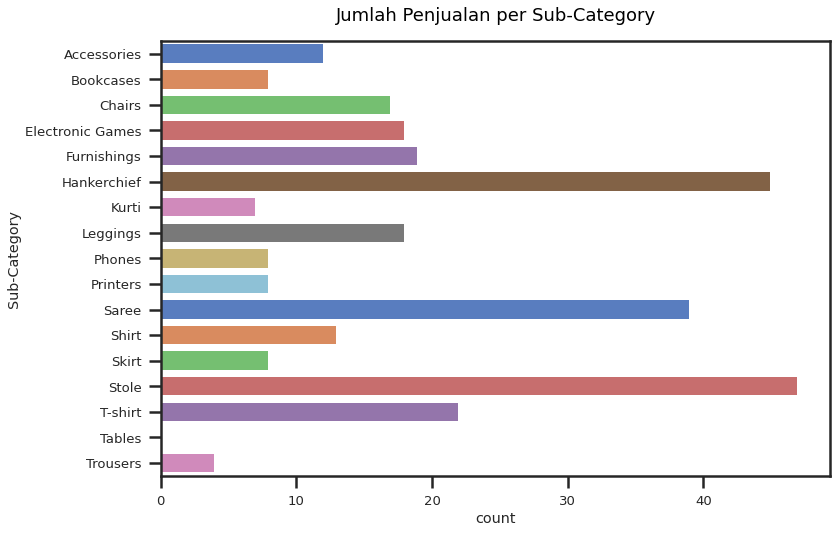

In [ ]:
#Jumlah Penjualan per Sub-Category di klaster 2
plt.figure(figsize=(12,8))
plt.title('Jumlah Penjualan per Sub-Category', loc='center', pad=20, fontsize=18, color='black')
sns.set_context("poster", font_scale=.6)
sns.countplot(y = 'Sub-Category', palette = 'muted', data=klaster2)

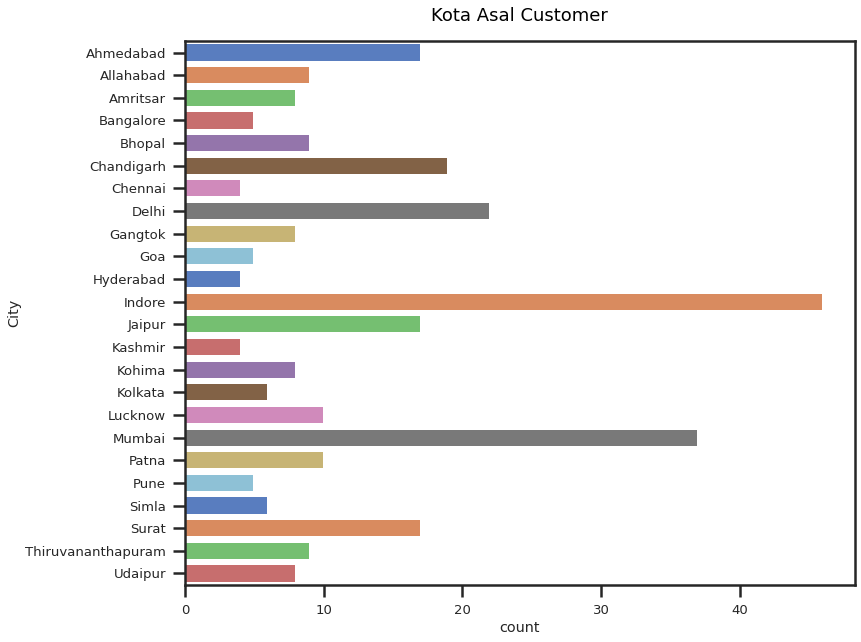

In [ ]:
#Kota Asal Customer di klaster 2
plt.figure(figsize=(12,10))
plt.title('Kota Asal Customer', loc='center', pad=20, fontsize=18, color='black')
sns.set_context("poster", font_scale=.6)
sns.countplot(y = 'City', palette = 'muted', data=klaster2)

Klaster 3

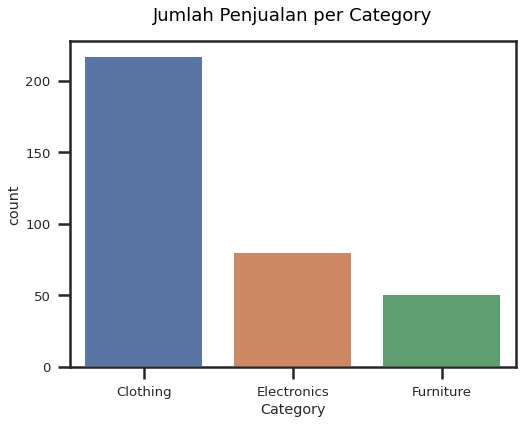

In [ ]:
#Jumlah Penjualan per Category di klaster 3
plt.figure(figsize=(8,6))
plt.title('Jumlah Penjualan per Category', loc='center', pad=20, fontsize=18, color='black')
sns.set_context("poster", font_scale=.6)
sns.countplot(klaster3['Category'])

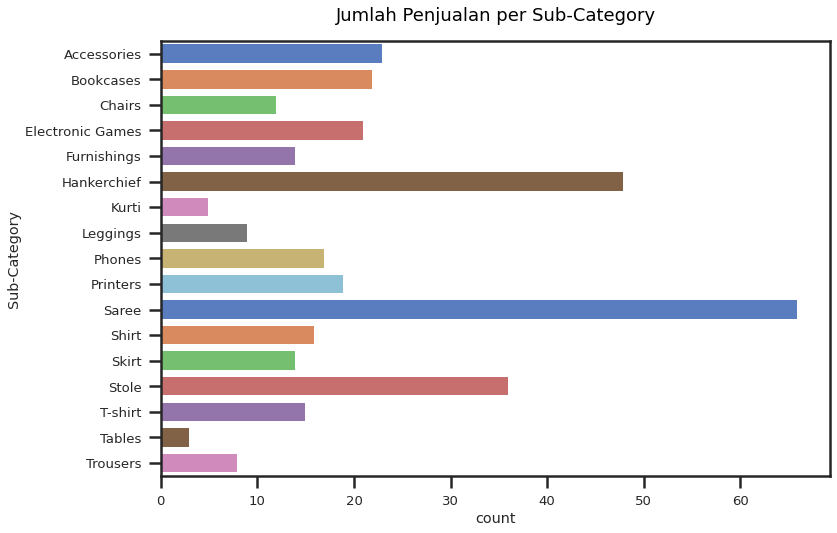

In [ ]:
#Jumlah Penjualan per Sub-Category di klaster 3
plt.figure(figsize=(12,8))
plt.title('Jumlah Penjualan per Sub-Category', loc='center', pad=20, fontsize=18, color='black')
sns.set_context("poster", font_scale=.6)
sns.countplot(y = 'Sub-Category', palette = 'muted', data=klaster3)

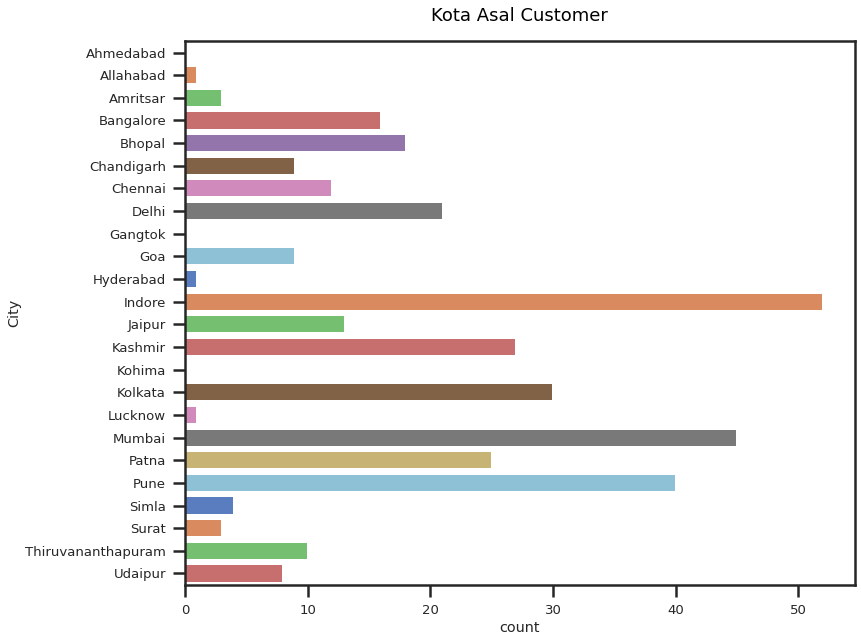

In [ ]:
#Kota Asal Customer di klaster 3
plt.figure(figsize=(12,10))
plt.title('Kota Asal Customer', loc='center', pad=20, fontsize=18, color='black')
sns.set_context("poster", font_scale=.6)
sns.countplot(y = 'City', palette = 'muted', data=klaster3)